# S&P 500 P/E Regression Modeling Managing Multicollinearity with PCA

### Credit:
    Data for this exercise is based on the S&P 500 companies fundamental data provided by Dominik Gawlik at
    https://www.kaggle.com/dgawlik/nyse

## Learning Objectives

Use Principal Components Decomposition/Analysis to model out multicollinearity
    * identify multicollinearity in the covariates
    * fit and interpret PCA
    * run regression on principal components

## Imports

In [4]:
import pandas as pd
import statsmodels.api as sms
import sklearn.decomposition as dcmp

In [5]:
%matplotlib inline

## Get Data and Subset Data

In [68]:
# retrieve csv file and store to dataframe
df = pd.read_csv('data/relative_valuation.csv')

# subset the dataframe removing rows with NULL values
bix = df.notnull().all(axis=1)
df = df[bix]

## Subset the colomns 
We want the target column `p/e` to be the first column. And use 
`Pre-TaxROE`,
`AfterTaxROE`,
`CashRatio`, 
`QuickRatio`,
`OperatingMargin`,
`Pre-TaxMargin`, 
`profit_margin`,
`operating_cash_flow_margin`,
`debt_to_equity`, 
`debt_to_asset`, 
`capital_surplus_to_asset`,
and
`Goodwill_to_asset`
as variables.

In [71]:
columns = [ 'Pre-TaxROE',
            'AfterTaxROE',
            'CashRatio', 
           'QuickRatio',
           'OperatingMargin',
           'Pre-TaxMargin', 
           'profit_margin',
           'operating_cash_flow_margin',
           'debt_to_equity', 
           'debt_to_asset', 
           'capital_surplus_to_asset',
           'Goodwill_to_asset',
          ]
df = df[['p/e'] + columns]

## A First Regression Model Using All Variables

The hope here is that we can get a batch look at how the variables relate to the target. This unfortunately fails due to tight correlations within the covariates.

In [13]:
model = sms.OLS(df['p/e'], sms.add_constant(df.iloc[:, 1:]))

Notes:
    * we acheive a fairly high R2 right off the bat with this approach
    * Almost all variables are significant or nearly so
    * there are a large number of variables, how do we know what should be in the model and what should be out?
    * warning 2 in the printed output below states there may be high multicollinearity (high correlation between covariates)

In [14]:
result = model.fit()

In [15]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    p/e   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     5.831
Date:                Mon, 27 Mar 2017   Prob (F-statistic):           4.72e-08
Time:                        13:19:20   Log-Likelihood:                -544.53
No. Observations:                 146   AIC:                             1115.
Df Residuals:                     133   BIC:                             1154.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
const               

## Look at Correlations in the Covariates

We should look at correlations in the covariates.

Chaining .style.background_gradient(cmap='viridis') on the end of the corr() call, styles the correlation matrix help us find high correlation items.

Notes:
    * there is low correlation between a number of the variables which appear significant and 'p/e'
    * there is high correlation between the variables like 'OperatingMargin', 'Pre-TaxMargin', 'profit_margin' and 'operating_cash_flow_margin'
    * these correlations between the covariates may be causing us issues

In [39]:
df.corr().style.background_gradient(cmap='Blues')

## Managing Correlations in Covariates

###### Create and Fit a PCA Object

In [25]:
pca = dcmp.PCA()
pca.fit(df.iloc[:, 1:])

PCA(copy=True, n_components=None, whiten=False)

###### Review the Components

If the model is meant to be interpreted and not just provide predictions, then we need to provide an interpretation of the variables.

Below we review the PCs and see:
    - CashRatio and QuickRatio are both heavily loaded in PC1
    - QuickRatio and Goodwill_to_asset are loaded heavy positive and CashRatio is loaded heavy negative for PC2
    - Pre-TaxROE and AfterTaxROE are loaded heavy positive, while capital_surplus_to_asset and Goodwill_to_asset are loaded heavy negative for PC3

In [26]:
pd.DataFrame(pca.components_.T, 
                columns=['PC' + str(i+1) for i in range(pca.components_.shape[1])],
                index=df.iloc[:, 1:].columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Pre-TaxROE,-0.008925,-0.049053,0.228678,0.370685,0.189586,-0.667154,-0.076148,0.409928,-0.235619,-0.312108,0.002083,-0.002142
AfterTaxROE,-0.002147,-0.028737,0.137949,0.248267,0.167053,-0.408163,-0.296178,-0.571534,0.355836,0.427286,-0.020807,0.001363
CashRatio,0.528662,-0.828669,-0.059076,0.126330,-0.092632,0.074791,0.005977,0.005341,0.007014,0.006045,0.007075,0.000449
QuickRatio,0.847557,0.521285,0.065453,-0.054245,0.019680,-0.046054,-0.010877,0.003697,-0.000767,-0.004176,-0.004918,-0.000534
OperatingMargin,0.010786,-0.004322,-0.043682,0.099599,0.434999,0.096665,0.337543,0.330425,0.749308,-0.069807,0.000079,0.004129
Pre-TaxMargin,0.019166,-0.020498,-0.012330,0.093433,0.480374,0.030004,0.541579,-0.050906,-0.472164,0.489725,-0.001280,-0.001427
profit_margin,0.015406,-0.020593,-0.025524,0.041883,0.336607,0.073805,0.174080,-0.602449,-0.088948,-0.685476,0.084509,-0.001002
operating_cash_flow_margin,0.017539,-0.035265,-0.065660,-0.062638,0.598230,0.338942,-0.680731,0.168626,-0.152467,0.023789,-0.042563,0.000545
debt_to_equity,-0.000114,0.007993,0.003785,-0.003376,0.001378,0.000269,-0.048675,0.044834,0.007465,0.068413,0.983532,0.153162
debt_to_asset,-0.000233,0.000966,-0.000513,0.000664,0.000809,0.001950,-0.007778,0.007428,0.005906,0.011584,0.152308,-0.988186


###### Review the Scree Plot

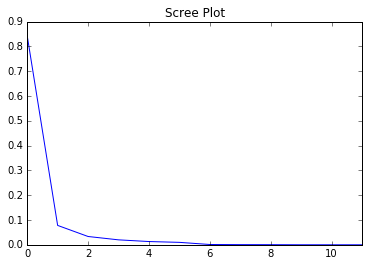

In [27]:
pd.Series(pca.explained_variance_ratio_).plot(title='Scree Plot');

###### Get the Transformed Data

In [64]:
transformed = pca.fit_transform(df.iloc[:, 1:])
reduced = transformed[:, :3]
data = pd.DataFrame(reduced, columns=['p1', 'p2', 'p3'])

###### Fit Regression on the Transformed Data

In [65]:
model = sms.OLS(df['p/e'].reset_index().drop('index', axis=1), sms.add_constant(data))

In [66]:
results = model.fit()

In [67]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    p/e   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     6.991
Date:                Mon, 27 Mar 2017   Prob (F-statistic):           0.000203
Time:                        14:01:32   Log-Likelihood:                -565.33
No. Observations:                 146   AIC:                             1139.
Df Residuals:                     142   BIC:                             1151.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         21.8885      0.976     22.436      0.0